<a href="https://colab.research.google.com/github/kbee181756/DS-Unit-2-Applied-Modeling/blob/master/NYCSchools_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes

In [0]:
url_1 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/LocationMaster.csv?token=AD456YXIQXFXK4SLLFTBIAK6MHDAC')
url_2 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/demographics.csv?token=AD456YXZMCQAPVYH5K4YXSS6MHDOK')
url_3 = ('https://raw.githubusercontent.com/kbee181756/Build-Project-1/master/cleanlatlong.csv?token=AD456YWK5JH6ITZLYGCGRAS6MVFBG')
url_4 = ('https://raw.githubusercontent.com/kbee181756/nyceducation/master/public_data.csv?token=AD456YVZL23DUZCKTE343326VK75O')
url_5 = ('https://raw.githubusercontent.com/kbee181756/nyceducation/master/_ELAscores13-19.csv?token=AD456YSNRHX7MZBU67UVYMC6VWRLA')

In [3]:
location = pd.DataFrame(pd.read_csv(url_1))
data = pd.DataFrame(pd.read_csv(url_2))
long_lat = pd.DataFrame(pd.read_csv(url_3))
ratings = pd.DataFrame(pd.read_csv(url_4))
ela_scores= pd.read_csv(url_5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ratings.dropna(how='all')

,DBN,School Name,Rigorous Instruction Score,Collaborative Teachers Score,Effective School Leadership Score,Strong Family-Community Ties Score,Trust Score
2,01M015,P.S. 015 ROBERTO CLEMENTE,4.02,4.10,4.19,4.18,3.96
3,01M019,P.S. 019 ASHER LEVY,4.80,4.53,4.51,4.66,3.76
4,01M020,P.S. 020 ANNA SILVER,1.92,2.71,2.98,3.84,3.14
5,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,2.14,2.69,2.59,3.67,2.38
6,01M063,THE STAR ACADEMY - P.S.63,NaN,NaN,NaN,NaN,3.77
...,...,...,...,...,...,...,...
1826,84X703,BRONX PREPARATORY CHARTER SCHOOL,3.51,3.50,3.08,2.93,2.76
1827,84X704,KIPP ACADEMY CHARTER SCHOOL,3.84,3.01,2.56,3.91,3.17
1828,84X706,HARRIET TUBMAN CHARTER SCHOOL,4.11,4.25,4.17,4.18,3.96
1829,84X718,BRONX CHARTER SCHOOL FOR BETTER LEARNING,4.27,4.10,4.25,4.64,4.23


In [5]:
ratings.isnull().sum()

DBN                                     2
School Name                             2
Rigorous Instruction Score            206
Collaborative Teachers Score          206
Effective School Leadership Score     206
Strong Family-Community Ties Score    221
Trust Score                            74
dtype: int64

In [6]:
ratings['Rigorous Instruction Score'].median()

3.6

In [7]:
ratings['Rigorous Instruction Score'].mean()

3.5881169230769205

In [0]:
cts_mean = ratings['Collaborative Teachers Score'].mean()
rig_mean = ratings['Rigorous Instruction Score'].mean()
esls_mean = ratings['Effective School Leadership Score'].mean()
sfct_mean = ratings['Strong Family-Community Ties Score'].mean()
trust_mean = ratings['Trust Score'].mean()

In [0]:
ratings['Rigorous Instruction Score'].fillna(rig_mean, inplace=True)
ratings['Collaborative Teachers Score'].fillna(cts_mean, inplace=True)
ratings['Effective School Leadership Score'].fillna(esls_mean, inplace=True)
ratings['Strong Family-Community Ties Score'].fillna(sfct_mean, inplace=True)
ratings['Trust Score'].fillna(trust_mean, inplace=True)                                                  

In [10]:
ratings.isnull().sum()

DBN                                   2
School Name                           2
Rigorous Instruction Score            0
Collaborative Teachers Score          0
Effective School Leadership Score     0
Strong Family-Community Ties Score    0
Trust Score                           0
dtype: int64

In [0]:
year_5 = data[data['Year'] == '2017-18']
year_4 = data[data['Year'] == '2016-17']

In [0]:
year_5 = pd.DataFrame(year_5.drop(axis=1, 
                                    columns=['Grade PK (Half Day & Full Day)',
                                            'Grade K', 
                                            'Grade 1', 
                                            'Grade 2', 
                                            'Grade 3', 
                                            'Grade 4', 
                                            'Grade 5', 
                                            'Grade 6', 
                                            'Grade 7', 
                                            'Grade 8', 
                                            'Grade 9', 
                                            'Grade 10', 
                                            'Grade 11', 
                                            'Grade 12',]))

year_4 = pd.DataFrame(year_4.drop(axis=1, 
                                    columns=['Grade PK (Half Day & Full Day)',
                                            'Grade K', 
                                            'Grade 1', 
                                            'Grade 2', 
                                            'Grade 3', 
                                            'Grade 4', 
                                            'Grade 5', 
                                            'Grade 6', 
                                            'Grade 7', 
                                            'Grade 8', 
                                            'Grade 9', 
                                            'Grade 10', 
                                            'Grade 11', 
                                            'Grade 12',]))

In [13]:
year_4.head()

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%
8,01M019,P.S. 019 Asher Levy,2016-17,271,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,58.20%
13,01M020,P.S. 020 Anna Silver,2016-17,540,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,68.00%
18,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.80%
23,01M063,The STAR Academy - P.S.63,2016-17,200,97,48.5,103,51.5,8,4.0,37,18.5,129,64.5,5,2.5,21,10.5,66,33.0,5,2.5,165,82.5,67.90%


In [14]:
year_5.head()

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.00%
9,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.20%
14,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.20%
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.90%
24,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.90%


In [0]:
year_5['Economic Need Index'] = list(map(lambda x: x[:-1], year_5['Economic Need Index'].values))

In [0]:
year_5['Economic Need Index'] = list(map(lambda x: x[:-1], year_5['Economic Need Index'].values))
year_5['Economic Need Index'] = [float(x) for x in year_5['Economic Need Index'].values]


In [0]:
year_5['Economic Need Index'] = [float(x) for x in year_5['Economic Need Index'].values]

In [17]:
year_5.head()

,DBN,School Name,Year,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.0
9,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.2
14,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.2
19,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.9
24,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.9


In [18]:
ela_scores.columns

Index(['DBN', 'School Name', 'Grade', 'Year', 'Category', 'Number Tested',
       'Mean Scale Score', '# Level 1', '% Level 1', '# Level 2', '% Level 2',
       '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4',
       '% Level 3+4'],
      dtype='object')

In [0]:
ela_scores = pd.DataFrame(ela_scores.drop(axis=1,
                                          columns=['# Level 1', '# Level 2','# Level 3', '# Level 4','# Level 3+4']))

In [20]:
ela_scores.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,289,51.9,40.7,7.4,0.0,7.4
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,285,55.6,44.4,0.0,0.0,0.0
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,16,282,56.3,31.3,12.5,0.0,12.5
3,01M015,P.S. 015 ROBERTO CLEMENTE,3,2016,All Students,20,293,50.0,30.0,20.0,0.0,20.0
4,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,All Students,27,302,37.0,29.6,25.9,7.4,33.3


In [21]:
ela_scores.isnull().sum()

DBN                 0
School Name         0
Grade               0
Year                0
Category            0
Number Tested       0
Mean Scale Score    0
% Level 1           0
% Level 2           0
% Level 3           0
% Level 4           0
% Level 3+4         0
dtype: int64

In [22]:
ela_scores.dtypes

DBN                 object
School Name         object
Grade               object
Year                 int64
Category            object
Number Tested        int64
Mean Scale Score    object
% Level 1           object
% Level 2           object
% Level 3           object
% Level 4           object
% Level 3+4         object
dtype: object

In [0]:
ela_scores['% Level 1'] = pd.to_numeric(ela_scores['% Level 1'],errors='coerce')
ela_scores['% Level 2'] = pd.to_numeric(ela_scores['% Level 2'],errors='coerce')
ela_scores['% Level 3'] = pd.to_numeric(ela_scores['% Level 3'],errors='coerce')
ela_scores['% Level 4'] = pd.to_numeric(ela_scores['% Level 4'],errors='coerce')
ela_scores['% Level 3+4'] = pd.to_numeric(ela_scores['% Level 3+4'],errors='coerce')

In [24]:
ela_scores['Year'].astype(str)

0        2013
1        2014
2        2015
3        2016
4        2017
         ... 
32821    2015
32822    2016
32823    2017
32824    2018
32825    2019
Name: Year, Length: 32826, dtype: object

In [0]:
ela_scores_2017 = pd.DataFrame(ela_scores[ela_scores['Year'] == 2017])
ela_scores_2016 = pd.DataFrame(ela_scores[ela_scores['Year'] == 2016])

In [26]:
ela_scores_2016.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
3,01M015,P.S. 015 ROBERTO CLEMENTE,3,2016,All Students,20,293,50.0,30.0,20.0,0.0,20.0
10,01M015,P.S. 015 ROBERTO CLEMENTE,4,2016,All Students,15,298,33.3,46.7,20.0,0.0,20.0
17,01M015,P.S. 015 ROBERTO CLEMENTE,5,2016,All Students,16,288,50.0,31.3,18.8,0.0,18.8
24,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293,45.1,35.3,19.6,0.0,19.6
31,01M019,P.S. 019 ASHER LEVY,3,2016,All Students,33,321,18.2,18.2,57.6,6.1,63.6


In [27]:
ela_scores_2017.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
4,01M015,P.S. 015 ROBERTO CLEMENTE,3,2017,All Students,27,302,37.0,29.6,25.9,7.4,33.3
11,01M015,P.S. 015 ROBERTO CLEMENTE,4,2017,All Students,23,314,4.3,52.2,39.1,4.3,43.5
18,01M015,P.S. 015 ROBERTO CLEMENTE,5,2017,All Students,17,310,5.9,64.7,29.4,0.0,29.4
25,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,All Students,67,308,17.9,46.3,31.3,4.5,35.8
32,01M019,P.S. 019 ASHER LEVY,3,2017,All Students,28,314,14.3,35.7,39.3,10.7,50.0


In [0]:
final_2017 = pd.DataFrame(ela_scores_2017.query('Grade=="All Grades" & Year == "2017"'))
final_2016 = pd.DataFrame(ela_scores_2016.query('Grade=="All Grades" & Year == "2016"'))

In [29]:
final_2017.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
25,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,All Students,67,308,17.9,46.3,31.3,4.5,35.8
53,01M019,P.S. 019 ASHER LEVY,All Grades,2017,All Students,87,316,9.2,39.1,35.6,16.1,51.7
81,01M020,P.S. 020 ANNA SILVER,All Grades,2017,All Students,208,297,35.6,35.6,18.8,10.1,28.8
130,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2017,All Students,218,300,22.0,50.9,22.0,5.0,27.1
158,01M063,THE STAR ACADEMY - P.S.63,All Grades,2017,All Students,63,324,7.9,30.2,42.9,19.0,61.9


In [30]:
final_2016.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
24,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293,45.1,35.3,19.6,0.0,19.6
52,01M019,P.S. 019 ASHER LEVY,All Grades,2016,All Students,94,315,14.9,31.9,38.3,14.9,53.2
80,01M020,P.S. 020 ANNA SILVER,All Grades,2016,All Students,219,301,31.1,35.6,25.6,7.8,33.3
129,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2016,All Students,247,299,25.1,47.4,23.9,3.6,27.5
157,01M063,THE STAR ACADEMY - P.S.63,All Grades,2016,All Students,48,312,18.8,37.5,33.3,10.4,43.8


In [31]:
print(final_2017.shape)
print(final_2016.shape)

(1093, 12)
(1084, 12)


In [0]:
most_updated_2017 = pd.DataFrame(pd.merge(most_updated_2017, location, left_on='DBN', right_on='ATS System Code'))

In [0]:
year_5_scores = pd.DataFrame(pd.merge(year_5, final_2017, left_on='DBN', right_on='DBN'))


In [0]:
year_4_scores = pd.DataFrame(pd.merge(year_4, final_2016, left_on='DBN', right_on='DBN'))

In [37]:
year_4_scores.head()

,DBN,School Name_x,Year_x,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,School Name_y,Grade,Year_y,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
0,01M015,P.S. 015 Roberto Clemente,2016-17,178,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293,45.1,35.3,19.6,0.0,19.6
1,01M019,P.S. 019 Asher Levy,2016-17,271,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,58.20%,P.S. 019 ASHER LEVY,All Grades,2016,All Students,94,315,14.9,31.9,38.3,14.9,53.2
2,01M020,P.S. 020 Anna Silver,2016-17,540,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,68.00%,P.S. 020 ANNA SILVER,All Grades,2016,All Students,219,301,31.1,35.6,25.6,7.8,33.3
3,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.80%,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2016,All Students,247,299,25.1,47.4,23.9,3.6,27.5
4,01M063,The STAR Academy - P.S.63,2016-17,200,97,48.5,103,51.5,8,4.0,37,18.5,129,64.5,5,2.5,21,10.5,66,33.0,5,2.5,165,82.5,67.90%,THE STAR ACADEMY - P.S.63,All Grades,2016,All Students,48,312,18.8,37.5,33.3,10.4,43.8


In [35]:
year_5_scores.head()

,DBN,School Name_x,Year_x,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,School Name_y,Grade,Year_y,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,99,52.1,91,47.9,20,10.5,52,27.4,110,57.9,2,1.1,6,3.2,45,23.7,8,4.2,161,84.7,89.0,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,All Students,67,308,17.9,46.3,31.3,4.5,35.8
1,01M019,P.S. 019 Asher Levy,2017-18,257,114,44.4,143,55.6,23,8.9,49,19.1,166,64.6,3,1.2,16,6.2,87,33.9,8,3.1,197,76.7,67.2,P.S. 019 ASHER LEVY,All Grades,2017,All Students,87,316,9.2,39.1,35.6,16.1,51.7
2,01M020,P.S. 020 Anna Silver,2017-18,497,244,49.1,253,50.9,147,29.6,51,10.3,264,53.1,19,3.8,16,3.2,114,22.9,86,17.3,356,71.6,79.2,P.S. 020 ANNA SILVER,All Grades,2017,All Students,208,297,35.6,35.6,18.8,10.1,28.8
3,01M034,P.S. 034 Franklin D. Roosevelt,2017-18,333,150,45.0,183,55.0,11,3.3,106,31.8,204,61.3,3,0.9,9,2.7,122,36.6,25,7.5,325,97.6,93.9,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2017,All Students,218,300,22.0,50.9,22.0,5.0,27.1
4,01M063,The STAR Academy - P.S.63,2017-18,203,100,49.3,103,50.7,6,3.0,37,18.2,128,63.1,8,3.9,24,11.8,67,33.0,2,1.0,166,81.8,75.9,THE STAR ACADEMY - P.S.63,All Grades,2017,All Students,63,324,7.9,30.2,42.9,19.0,61.9


In [0]:
import plotly.express as px

In [39]:
px.scatter(year_4_scores,
           x='% Poverty',
           y='% Level 3',
           title= 'Poverty v. Level 3',
           trendline='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [40]:
px.scatter(year_5_scores,
           x='% Poverty',
           y='% Level 3',
           title= 'Poverty v. Level 3',
           trendline='ols')

In [42]:
year_4_scores.dtypes

DBN                                            object
School Name_x                                  object
Year_x                                         object
Total Enrollment                                int64
# Female                                        int64
% Female                                      float64
# Male                                          int64
% Male                                        float64
# Asian                                         int64
% Asian                                       float64
# Black                                         int64
% Black                                       float64
# Hispanic                                      int64
% Hispanic                                    float64
# Multiple Race Categories Not Represented      int64
% Multiple Race Categories Not Represented    float64
# White                                         int64
% White                                       float64
# Students with Disabilities

In [0]:
year_4_scores['Mean Scale Score'] = pd.to_numeric(year_4_scores['Mean Scale Score'], errors='coerce')

In [0]:
year_5_scores['Mean Scale Score'] = pd.to_numeric(year_5_scores['Mean Scale Score'], errors='coerce')

In [47]:
px.scatter(year_4_scores,
           x='% Poverty',
           y='Mean Scale Score',
           title= 'Poverty v. Level 3',
           trendline='ols')

In [49]:
px.scatter(year_5_scores,
           x='% Poverty',
           y='Mean Scale Score',
           title= 'Poverty v. Mean Scale Score',
           trendline='ols')

In [51]:
px.scatter(year_4_scores,
           x='% Black',
           y='Mean Scale Score',
           title= '% Black & Mean Scale Score',
           trendline='ols')

In [52]:
px.scatter(year_5_scores,
           x='% Black',
           y='Mean Scale Score',
           title= '% Black & Mean Scale Score',
           trendline='ols')

In [53]:
px.scatter(year_4_scores,
           x='% White',
           y='Mean Scale Score',
           title= '% White & Mean Scale Score',
           trendline='ols')

In [54]:
px.scatter(year_4_scores,
           x='% Hispanic',
           y='Mean Scale Score',
           title= '% Hispanic & Mean Scale Score',
           trendline='ols')

In [56]:
px.scatter(year_4_scores,
           x='% Asian',
           y='Mean Scale Score',
           title= '% Asian & Mean Scale Score',
           trendline='ols')

In [58]:
px.scatter(year_5_scores,
           x='% White',
           y='Mean Scale Score',
           title= '% White & Mean Scale Score',
           trendline='ols')

In [0]:
corr = pd.DataFrame(year_5_scores.corr())

In [0]:
import seaborn as sns

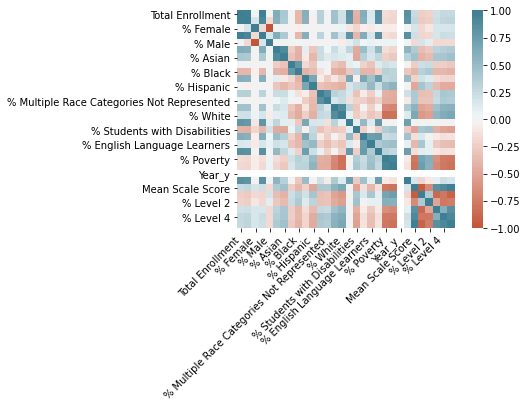

In [66]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
corr = corr.dropna(how='all')

In [73]:
px.scatter(corr,
           x='Economic Need Index',
           y='Mean Scale Score',
           title= '% White & Mean Scale Score',
           trendline='ols')

In [74]:
px.scatter(year_5_scores,
           x='% White',
           y='% Level 3',
           title= '% White & Level 3',
           trendline='ols')

In [75]:
px.scatter(year_5_scores,
           x='% Black',
           y='% Level 3',
           title= '% Black & Level 3',
           trendline='ols')

In [76]:
px.scatter(year_5_scores,
           x='% Black',
           y='% Level 3',
           title= '% Black & Level 3',
           trendline='ols')

In [77]:
px.scatter(year_5_scores,
           x='% Black',
           y='% Level 1',
           title= '% Black & Level 1',
           trendline='ols')

In [79]:
px.scatter(year_5_scores,
           x='% Hispanic',
           y='% Black',
           title= '% Hispanic & Level 1',
           trendline='ols')

In [80]:
px.scatter(year_5_scores,
           x='% Hispanic',
           y='% White',
           title= '% Hispanic & % White',
           trendline='ols')

In [81]:
location.head()

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Grades Final,Open Date,Status Description,Building Code,Primary Address,City,State Code,Zip,Principal Name,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"0K,01,02,03,04,05,06,SE","0K,01,02,03,04,05,06",Jul 1 1904,Open,M015,333 EAST 4 STREET,MANHATTAN,NY,10009,Thomas Staebell,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE","0K,01,02,03,04,05,06",Jul 1 1956,Open,M019,185 1 AVENUE,MANHATTAN,NY,10003,Ivan Kushner,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE","0K,01,02,03,04,05,06",Jul 1 1963,Open,M020,166 ESSEX STREET,MANHATTAN,NY,10002,James Lee,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"0K,01,02,03,04,05,06,07,08,SE","0K,01,02,03,04,05,06,07,08",Jul 1 1955,Open,M034,730 EAST 12 STREET,MANHATTAN,NY,10009,Joyce Stallings Harte,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M063,M063,P.S. 063 William McKinley,310100010063,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE","0K,01,02,03,04,05,06",Jul 1 1905,Open,M063,121 EAST 3 STREET,MANHATTAN,NY,10009,DARLENE DESPEIGNES,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
location = pd.DataFrame(location.dropna(axis=1))

In [85]:
location.head()

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Open Date,Status Description,Building Code,City,State Code,Zip,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name
0,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,Open,M015,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01
1,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,Open,M019,MANHATTAN,NY,10003,1,1,M801,COMMUNITY SCHOOL DISTRICT 01
2,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,Open,M020,MANHATTAN,NY,10002,1,1,M801,COMMUNITY SCHOOL DISTRICT 01
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,Open,M034,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01
4,01M063,M063,P.S. 063 William McKinley,310100010063,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,Open,M063,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01


In [0]:
year_4_scores_loc = pd.DataFrame(pd.merge(location, year_4_scores, left_on='ATS System Code', right_on='DBN'))

In [0]:
year_5_scores_loc = pd.DataFrame(pd.merge(location, year_5_scores, left_on='ATS System Code', right_on='DBN'))

In [87]:
year_4_scores_loc.head()

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Open Date,Status Description,Building Code,City,State Code,Zip,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,DBN,School Name_x,Year_x,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,School Name_y,Grade,Year_y,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4
0,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,Open,M015,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M015,P.S. 015 Roberto Clemente,2016-17,178,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293.0,45.1,35.3,19.6,0.0,19.6
1,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,Open,M019,MANHATTAN,NY,10003,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M019,P.S. 019 Asher Levy,2016-17,271,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,58.20%,P.S. 019 ASHER LEVY,All Grades,2016,All Students,94,315.0,14.9,31.9,38.3,14.9,53.2
2,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,Open,M020,MANHATTAN,NY,10002,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M020,P.S. 020 Anna Silver,2016-17,540,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,68.00%,P.S. 020 ANNA SILVER,All Grades,2016,All Students,219,301.0,31.1,35.6,25.6,7.8,33.3
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,Open,M034,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.80%,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2016,All Students,247,299.0,25.1,47.4,23.9,3.6,27.5
4,01M063,M063,P.S. 063 William McKinley,310100010063,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,Open,M063,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M063,The STAR Academy - P.S.63,2016-17,200,97,48.5,103,51.5,8,4.0,37,18.5,129,64.5,5,2.5,21,10.5,66,33.0,5,2.5,165,82.5,67.90%,THE STAR ACADEMY - P.S.63,All Grades,2016,All Students,48,312.0,18.8,37.5,33.3,10.4,43.8


In [0]:
long_lat = pd.DataFrame(long_lat.drop(['Unnamed: 0'], axis=1))

In [92]:
long_lat.head()

,system_code,location_code,location_name,primary_address_line_1,LONGITUDE,LATITUDE
0,15K001,K001,P.S. 001 The Bergen,309 47 STREET,-74.011420,40.648959
1,17K002,K002,Parkside Preparatory Academy,655 PARKSIDE AVENUE,-73.951575,40.656423
2,13K003,K003,P.S. 003 The Bedford Village,50 JEFFERSON AVENUE,-73.955219,40.682311
3,75K004,K004,P.S. K004,923 JEROME STREET,-73.879276,40.658500
4,16K005,K005,P.S. 005 Dr. Ronald McNair,820 HANCOCK STREET,-73.921970,40.685241


In [0]:
year_4_scores_loc_fix = pd.DataFrame(pd.merge(year_4_scores_loc, long_lat, right_on='system_code', left_on='DBN'))

In [0]:
year_5_scores_loc_fix = pd.DataFrame(pd.merge(year_5_scores_loc, long_lat, right_on='system_code', left_on='DBN'))

In [96]:
year_4_scores_loc_fix.head()

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Open Date,Status Description,Building Code,City,State Code,Zip,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,DBN,School Name_x,Year_x,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,School Name_y,Grade,Year_y,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4,system_code,location_code,location_name,primary_address_line_1,LONGITUDE,LATITUDE
0,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"0K,01,02,03,04,05,06,SE",Jul 1 1904,Open,M015,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M015,P.S. 015 Roberto Clemente,2016-17,178,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293.0,45.1,35.3,19.6,0.0,19.6,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
1,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1956,Open,M019,MANHATTAN,NY,10003,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M019,P.S. 019 Asher Levy,2016-17,271,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,58.20%,P.S. 019 ASHER LEVY,All Grades,2016,All Students,94,315.0,14.9,31.9,38.3,14.9,53.2,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE,-73.984496,40.730009
2,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1963,Open,M020,MANHATTAN,NY,10002,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M020,P.S. 020 Anna Silver,2016-17,540,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,68.00%,P.S. 020 ANNA SILVER,All Grades,2016,All Students,219,301.0,31.1,35.6,25.6,7.8,33.3,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET,-73.986312,40.721305
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"0K,01,02,03,04,05,06,07,08,SE",Jul 1 1955,Open,M034,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.80%,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2016,All Students,247,299.0,25.1,47.4,23.9,3.6,27.5,01M034,M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,-73.975058,40.726008
4,01M063,M063,P.S. 063 William McKinley,310100010063,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",Jul 1 1905,Open,M063,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M063,The STAR Academy - P.S.63,2016-17,200,97,48.5,103,51.5,8,4.0,37,18.5,129,64.5,5,2.5,21,10.5,66,33.0,5,2.5,165,82.5,67.90%,THE STAR ACADEMY - P.S.63,All Grades,2016,All Students,48,312.0,18.8,37.5,33.3,10.4,43.8,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET,-73.986214,40.724440


In [105]:
year_4_scores_loc_fix.isnull().sum()

ATS System Code                               0
Location Code                                 0
Location Name                                 0
BEDS Number                                   0
Managed By Name                               0
Location Type Description                     0
Location Category Description                 0
Grades                                        0
Open Date                                     0
Status Description                            0
Building Code                                 0
City                                          0
State Code                                    0
Zip                                           0
Geographical District Code                    0
Administrative District Code                  0
Administrative District Location Code         0
Administrative District Name                  0
DBN                                           0
School Name_x                                 0
Year_x                                  

In [108]:
year_4_scores_loc_fix.dtypes

ATS System Code                                object
Location Code                                  object
Location Name                                  object
BEDS Number                                     int64
Managed By Name                                object
Location Type Description                      object
Location Category Description                  object
Grades                                         object
Open Date                                      object
Status Description                             object
Building Code                                  object
City                                           object
State Code                                     object
Zip                                             int64
Geographical District Code                      int64
Administrative District Code                    int64
Administrative District Location Code          object
Administrative District Name                   object
DBN                         

In [0]:
year_4_scores_loc_fix['Open Date'] = pd.to_datetime(year_4_scores_loc_fix['Open Date'], errors='coerce')

In [110]:
year_4_scores_loc_fix.head()

,ATS System Code,Location Code,Location Name,BEDS Number,Managed By Name,Location Type Description,Location Category Description,Grades,Open Date,Status Description,Building Code,City,State Code,Zip,Geographical District Code,Administrative District Code,Administrative District Location Code,Administrative District Name,DBN,School Name_x,Year_x,Total Enrollment,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,School Name_y,Grade,Year_y,Category,Number Tested,Mean Scale Score,% Level 1,% Level 2,% Level 3,% Level 4,% Level 3+4,system_code,location_code,location_name,primary_address_line_1,LONGITUDE,LATITUDE
0,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"0K,01,02,03,04,05,06,SE",1904-07-01,Open,M015,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M015,P.S. 015 Roberto Clemente,2016-17,178,83,46.6,95,53.4,14,7.9,51,28.7,105,59.0,4,2.2,4,2.2,51,28.7,12,6.7,152,85.4,89.20%,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,All Students,51,293.0,45.1,35.3,19.6,0.0,19.6,01M015,M015,P.S. 015 Roberto Clemente,333 EAST 4 STREET,-73.978747,40.722075
1,01M019,M019,P.S. 019 Asher Levy,310100010019,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",1956-07-01,Open,M019,MANHATTAN,NY,10003,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M019,P.S. 019 Asher Levy,2016-17,271,127,46.9,144,53.1,24,8.9,51,18.8,180,66.4,1,0.4,15,5.5,88,32.5,9,3.3,207,76.4,58.20%,P.S. 019 ASHER LEVY,All Grades,2016,All Students,94,315.0,14.9,31.9,38.3,14.9,53.2,01M019,M019,P.S. 019 Asher Levy,185 1 AVENUE,-73.984496,40.730009
2,01M020,M020,P.S. 020 Anna Silver,310100010020,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",1963-07-01,Open,M020,MANHATTAN,NY,10002,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M020,P.S. 020 Anna Silver,2016-17,540,265,49.1,275,50.9,175,32.4,52,9.6,264,48.9,22,4.1,27,5.0,116,21.5,93,17.2,315,58.3,68.00%,P.S. 020 ANNA SILVER,All Grades,2016,All Students,219,301.0,31.1,35.6,25.6,7.8,33.3,01M020,M020,P.S. 020 Anna Silver,166 ESSEX STREET,-73.986312,40.721305
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,310100010034,DOE,General Academic,K-8,"0K,01,02,03,04,05,06,07,08,SE",1955-07-01,Open,M034,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M034,P.S. 034 Franklin D. Roosevelt,2016-17,350,170,48.6,180,51.4,19,5.4,102,29.1,216,61.7,2,0.6,11,3.1,130,37.1,27,7.7,348,99.4,86.80%,P.S. 034 FRANKLIN D. ROOSEVELT,All Grades,2016,All Students,247,299.0,25.1,47.4,23.9,3.6,27.5,01M034,M034,P.S. 034 Franklin D. Roosevelt,730 EAST 12 STREET,-73.975058,40.726008
4,01M063,M063,P.S. 063 William McKinley,310100010063,DOE,General Academic,Elementary,"0K,01,02,03,04,05,SE",1905-07-01,Open,M063,MANHATTAN,NY,10009,1,1,M801,COMMUNITY SCHOOL DISTRICT 01,01M063,The STAR Academy - P.S.63,2016-17,200,97,48.5,103,51.5,8,4.0,37,18.5,129,64.5,5,2.5,21,10.5,66,33.0,5,2.5,165,82.5,67.90%,THE STAR ACADEMY - P.S.63,All Grades,2016,All Students,48,312.0,18.8,37.5,33.3,10.4,43.8,01M063,M063,The STAR Academy - P.S.63,121 EAST 3 STREET,-73.986214,40.724440


In [0]:
year_4_scores_loc_fix['Economic Need Index'] = list(map(lambda x: x[:-1], year_4_scores_loc_fix['Economic Need Index'].values))
year_4_scores_loc_fix['Economic Need Index'] = [float(x) for x in year_4_scores_loc_fix['Economic Need Index'].values]


In [116]:
px.scatter(year_4_scores_loc_fix,
           x='Open Date',
           y='% Black',
           title= 'LAT/LONG',
           trendline='ols')

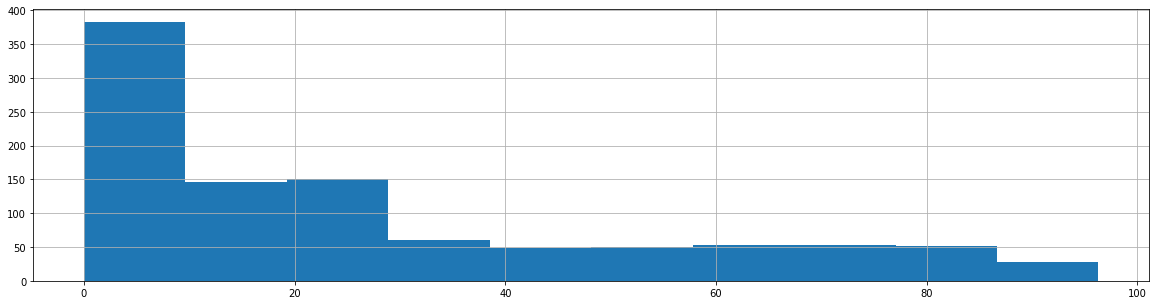

In [121]:
year_4_scores_loc_fix['% Black'].hist(figsize=(20,5));

In [118]:
year_4_scores_loc_fix['% Level 2'].mean()

35.29064327485381

In [0]:
most_updated['% Level 1'] = pd.to_numeric(most_updated['% Level 1'],errors='coerce')
most_updated['% Level 2'] = pd.to_numeric(most_updated['% Level 2'],errors='coerce')
most_updated['% Level 3'] = pd.to_numeric(most_updated['% Level 3'],errors='coerce')
most_updated['% Level 4'] = pd.to_numeric(most_updated['% Level 4'],errors='coerce')
most_updated['% Level 3+4'] = pd.to_numeric(most_updated['% Level 3+4'],errors='coerce')